Aman Dubal

SHETH L.U.J & SIR MV COLLEGE OF SCIENCE , COMMERCE AND ARTS

Aim : Logistic Regression and Decision Tree:
1. Build a logistic regression model to predict a binary outcome.
2. Evaluate the model's performance using classification metrics (e.g., accuracy,
precision, recall).
3. Construct a decision tree model and interpret the decision rules for classification.

Dataset in Use:\
Stroke Prediction Dataset

This dataset contains medical and demographic information about patients, used to predict whether a person is likely to have a stroke. It includes features such as age, gender, hypertension, heart disease, glucose level, BMI, smoking status, and lifestyle factors. The target variable is stroke, which indicates whether the patient has experienced a stroke (1) or not (0).

It is commonly used for classification tasks in machine learning to build models that can help in early stroke risk detection.

## Logistic Regression

1. Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

print("First 5 rows of data:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nClass distribution (stroke):")
print(df['stroke'].value_counts())

First 5 rows of data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Info:
<class 'pandas.core.frame.D

 3. Preprocessing

In [3]:
# 3.1 Drop id column
df = df.drop(columns=['id'])

# 3.2 Handle missing values in 'bmi' Replacing With mean
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# 3.3 Convert categorical variables to numeric
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


4. Split into features (X) and target (y)

In [5]:
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

5. Train-test split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3832, 16)
Test set shape: (1278, 16)


6. Feature scaling (important for Logistic Regression)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7. Model development and training

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

8. Prediction

In [13]:
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("\nPredicted labels (first 20):")
print(y_pred[:20])


Predicted labels (first 20):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


9. Evaluation metrics

In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, zero_division=0)
recall = metrics.recall_score(y_test, y_pred, zero_division=0)
f1 = metrics.f1_score(y_test, y_pred, zero_division=0)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print("\n----- Evaluation Metrics -----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", auc)


----- Evaluation Metrics -----
Accuracy : 0.9522691705790297
Precision: 1.0
Recall   : 0.016129032258064516
F1-score : 0.031746031746031744
ROC-AUC  : 0.8416144949066213


10. Confusion Matrix


Confusion Matrix:
[[1216    0]
 [  61    1]]


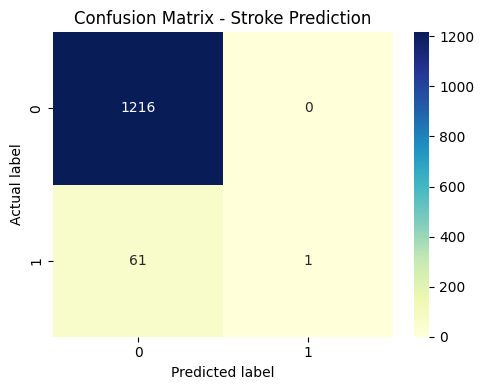

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Stroke Prediction")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.tight_layout()
plt.show()

11. ROC Curve

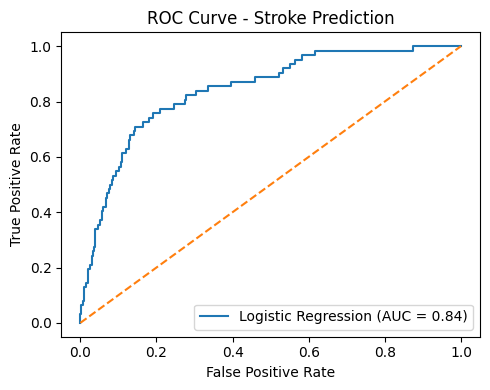

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(auc))
plt.plot([0,1], [0,1], linestyle='--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stroke Prediction")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Decision Tree

1. Import libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset


In [19]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print("First 5 rows:")
print(df.head())
print("\nInfo:")
print(df.info())

First 5 rows:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Info:
<class 'pandas.core.frame.DataFrame

3. Preprocessing

In [20]:
# 3.1 Drop id column
df = df.drop(columns=["id"])

# 3.2 Handle missing values in bmi
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# 3.3 One-hot encode categorical columns
cat_cols = ["gender", "ever_married", "work_type",
            "Residence_type", "smoking_status"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


4. Split into features and target


In [21]:
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]


5. Train–test split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (3832, 16)
Test shape : (1278, 16)


6. Build Decision Tree model


In [24]:
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)


7. Train the model


In [25]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

8. Predictions


In [26]:
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

print("\nPredicted labels (first 20):")
print(y_pred[:20])



Predicted labels (first 20):
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


9. Evaluation metrics


In [27]:
accuracy  = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, zero_division=0)
recall    = metrics.recall_score(y_test, y_pred, zero_division=0)
f1        = metrics.f1_score(y_test, y_pred, zero_division=0)
auc       = metrics.roc_auc_score(y_test, y_pred_proba)

print("\n----- Evaluation Metrics -----")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", auc)


----- Evaluation Metrics -----
Accuracy : 0.9061032863849765
Precision: 0.10810810810810811
Recall   : 0.12903225806451613
F1-score : 0.11764705882352941
ROC-AUC  : 0.5373779711375212


10. Confusion Matrix



Confusion Matrix:
[[1150   66]
 [  54    8]]


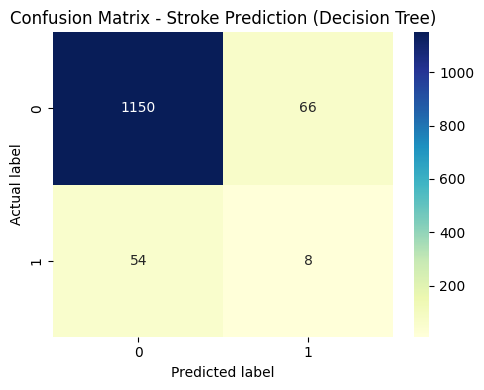

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Stroke Prediction (Decision Tree)")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.tight_layout()
plt.show()


11. ROC Curve


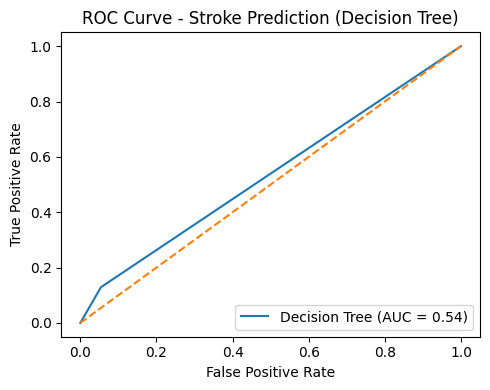

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label="Decision Tree (AUC = {:.2f})".format(auc))
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stroke Prediction (Decision Tree)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

12. Visualize the tree – keep depth small if graph is too big


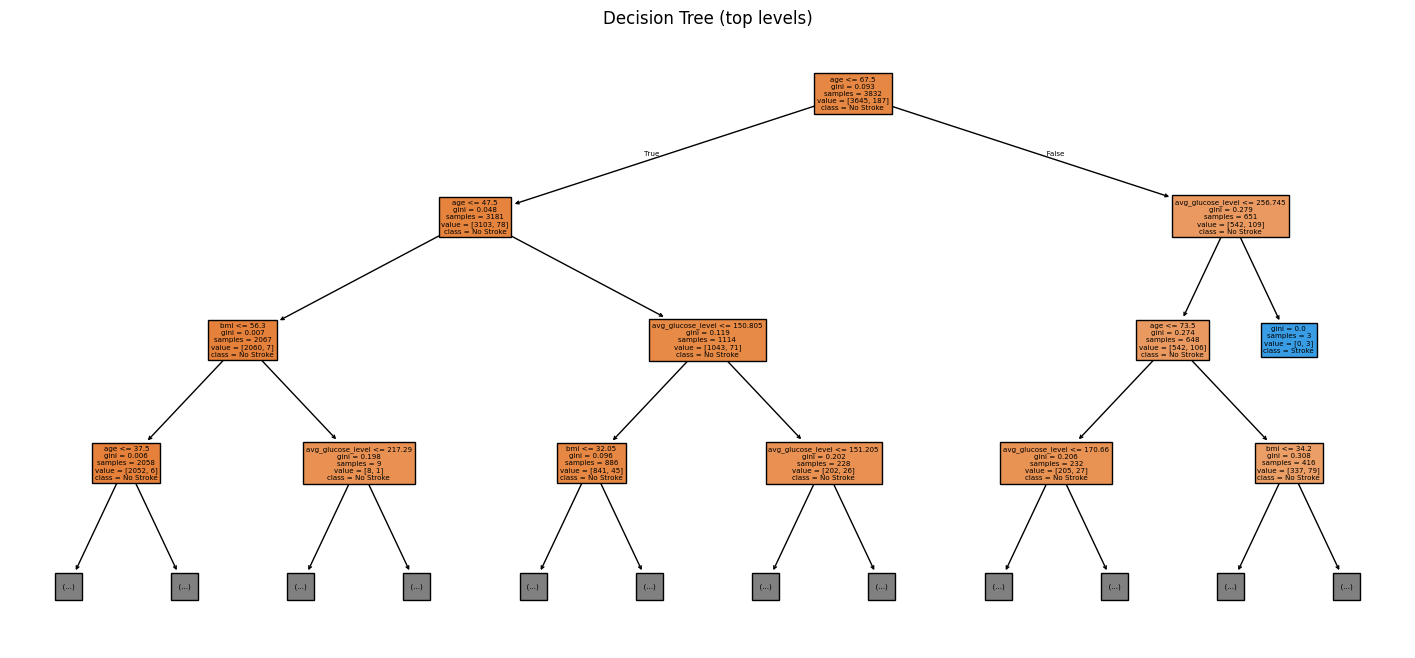

In [30]:
plt.figure(figsize=(18,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Stroke", "Stroke"],
    filled=True,
    max_depth=3
)
plt.title("Decision Tree (top levels)")
plt.show()